### Perform Drude-Smith fit on experimental data

In [9]:
from drude_smith_fit import check_input_parameters
from drude_smith_fit import read_csv
from drude_smith_fit import perform_fit
from drude_smith_fit import plot_experimental_and_fitted_data
from drude_smith_fit import print_fit_results
from drude_smith_fit import write_csv, write_parameters

Define input

In [10]:
input_filename = "combine.csv"

min_frequency = 0.E12
max_frequency = 2.5E12

Fix parameters

In [11]:
fix_phi = 0.5
fix_m = 0.2
fix_tau = False  # fix tau in fs
fix_c1 = False
fix_c2 = 0.
fix_c3 = 0.
fix_phi_ex = 0.5
fix_fbn = False
fix_wbn = 12.  # fix wbn in THz
fix_gamma = False  # fix gamma in THz

num_variable_params = check_input_parameters(
    fix_phi, fix_m, fix_tau, fix_c1, fix_c2, fix_c3,
    fix_phi_ex, fix_fbn, fix_wbn, fix_gamma
)

Define output

In [12]:

image_filename = input_filename.split('.')[0] + '.png'
param_filename = input_filename.split('.')[0] + '_param.csv'
data_filename = input_filename.split('.')[0] + '_fitted.csv'

Read the experimental data

In [13]:
frequencies, complex_numbers = read_csv(
    input_filename, min_frequency, max_frequency
)

Perform the fit

In [14]:
fitted_complex_numbers, \
    [phi_fit, m_fit, tau_fit, c1_fit, c2_fit, c3_fit,
     phi_ex_fit, fbn_fit, wbn_fit, gamma_fit], \
    std_dev = perform_fit(
        frequencies, complex_numbers, num_variable_params
    )

Export the results

Value of phi: 5.000e-01 fixed
Value of m: 2.000e-01 fixed
Value of tau: 7.000e-13 +/- 1.236e-29
Value of c1: -7.000e-01 +/- 1.585e-17
Value of c2: 0.000e+00 fixed
Value of c3: 0.000e+00 fixed
Value of phi_ex: 5.000e-01 fixed
Value of fbn: 4.000e-01 +/- 9.663e-18
Value of wbn: 1.200e+13 fixed
Value of gamma: 1.000e+12 +/- 3.282e-05


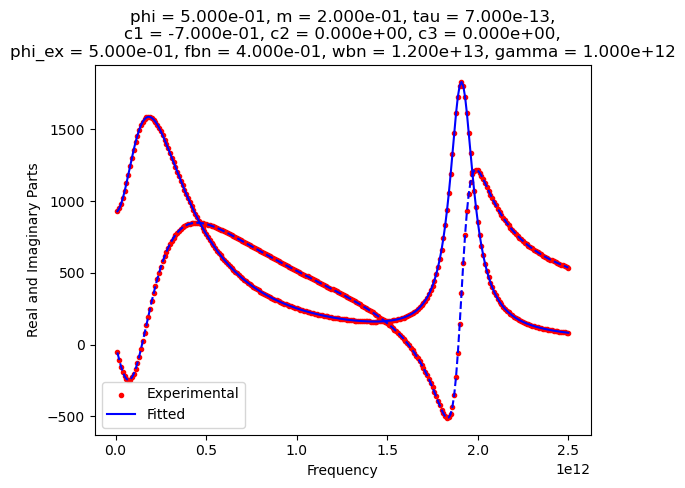

In [15]:
print_fit_results(phi_fit, m_fit, tau_fit, c1_fit, c2_fit, c3_fit,
    phi_ex_fit, fbn_fit, wbn_fit, gamma_fit, std_dev)

title = ("phi = %.3e, m = %.3e, tau = %.3e,\n"
         "c1 = %.3e, c2 = %.3e, c3 = %.3e,\n"
         "phi_ex = %.3e, fbn = %.3e, wbn = %.3e, gamma = %.3e")
plot_experimental_and_fitted_data(
    frequencies, complex_numbers, fitted_complex_numbers,
    title
    % (phi_fit, m_fit, tau_fit, c1_fit, c2_fit, c3_fit,
       phi_ex_fit, fbn_fit, wbn_fit, gamma_fit),
    image_filename
)

write_parameters(
    param_filename, phi_fit, m_fit, tau_fit,
    c1_fit, c2_fit, c3_fit, phi_ex_fit, fbn_fit, wbn_fit, gamma_fit, std_dev
)

write_csv(
    data_filename, frequencies, complex_numbers,
    fitted_complex_numbers
)